# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#разделяем склеенные строки сепаратором '\t'
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Названия столбцов:

airports_nearest — расстояние до ближайшего аэропорта(м)  
balcony — наличие/ количество балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра(м)  
days_exposition — количество дней публикации  
first_day_exposition — дата начала публикации  
floor — этаж  
floors_total — этажность дома  
is_apartment — апартаменты  
kitchen_area — площадь кухни(м²)  
last_price — цена на момент публикации  
living_area — жилая площадь(м²)  
locality_name — место расположения  
open_plan — открытая планировка (булев тип)  
parks_around3000 — парк в радиусе 3000м  
parks_nearest — расстояние до парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — озеро рядом (м)  
rooms — число комнат 
studio — квартира-студия   
total_area — площадь квартиры(м²)  
total_images — число фотографий в объявлении 

Датасет содержит 22 столбца и 23699 строк. Имеются столбцы различных типов данных, имеются строковые, например first_day_exposition - его мы переведем в формат даты на этапе предобработки.
Много столбцов типа float, некоторые из них для удобства можно будет перевести в int.
Имеются пропуски, рассмотрим их количество ниже.

## Предобработка данных

In [5]:
display(df.isnull().sum())# смотрим пропуски еще раз
df.duplicated().sum()# дубликатов нет

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

0

is_apartment - можно предположить, что там, где ответ - "0", нет данных и, скорее всего, это не апартаменты;
переводим значения столбца в булев тип(да/нет) и пропуски заменим 0

In [6]:
df['is_apartment']=df['is_apartment'].fillna(0).astype('bool') 
#df['is_apartment'].isnull().sum()

balcony - вполне возможно, что где балкон отсутствует, там стоит NaN;
аналогично пропуски в значениях балкон заменим на 0 и переводим в булев тип,
так как для исследования важно его наличие либо отсутствие

In [7]:
df['balcony'] = df['balcony'].fillna(0).astype('bool')
display(df['balcony'].isnull().sum())# поверяем пропуски-0

0

locality_name - не так много строк(49), где не указано место расположения, предположу, что эта графа не заполнялась, так как владельцы не придавали значения этому пункту, оставим пустое значение в строках с пропусками;
отсутствие имени не повлияет на результаты, переведем значение в строковый тип.

In [8]:
df['locality_name'] = df['locality_name'].fillna('').astype('str')

days_exposition - параметр, который пригодится нам в дальнейшем. Информация может отсутствовать, например,
потому что сделка была совершена, но не была закрыта на онлайн-ресурсе. 
По той же причине можем получить результаты в виде срока продажи квартиры в несколько лет, хотя нельзя исключить, 
что у квартиры при продаже имеются существенные недостатки, что увеличивает её срок.

In [9]:
df['days_exposition'] = df['days_exposition'].round().fillna(0).astype('int')

cityCenters_nearest - сделаем целочисленным для дальнейших исследований, пропуски ничем не будем заполнять.

In [10]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0).round().astype('int') 

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  bool   
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

None

Недостающие значения в столбцах 'ceiling_height','floors_total', 'living_area', 'kitchen_area' заменим на средними показателями, так как их удаление может повлиять на объективность исследования. Предполагаю, что некоторые продавцы не считали эти пункты обязательными для заполнения, возможно,
кто-то не знал на момент заполнения жилую или площадь кухни.

In [11]:
def fill_na(column):
    mean = df[column].mean()
    df[column] = df[column].fillna(mean)
    
fill_na('living_area')
fill_na('kitchen_area')
fill_na('ceiling_height')
fill_na('floors_total')

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  bool   
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

None

In [12]:
def to_int(column): # округление и перевод в int
    df[column] = df[column].astype('int')
    
to_int('last_price')
to_int('living_area')
to_int('kitchen_area')
to_int('ceiling_height')
to_int('total_area')
to_int('floors_total')

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  int64  
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  int64  
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  int64  
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  int64  
 13  balcony               23699 non-null  bool   
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,2,16,51,8,False,...,25,False,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,0
1,7,3350000,40,2018-12-04T00:00:00,1,2,11,18,1,False,...,11,True,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81
2,10,5196000,56,2015-08-20T00:00:00,2,2,5,34,4,False,...,8,False,Санкт-Петербург,21741.0,13933,1.0,90.0,2.0,574.0,558
3,0,64900000,159,2015-07-24T00:00:00,3,2,14,34,9,False,...,10,False,Санкт-Петербург,28098.0,6800,2.0,84.0,3.0,234.0,424
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,False,...,41,False,Санкт-Петербург,31856.0,8098,2.0,112.0,1.0,48.0,121


Посмотрим на объем наших данных и попробуем его сократить:

In [13]:
for dtype in ['float','int','object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    display("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

'Average memory usage for float columns: 0.15 MB'

'Average memory usage for int columns: 0.17 MB'

'Average memory usage for object columns: 1.40 MB'

In [14]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: 
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 
    return "{:03.2f} MB".format(usage_mb)

df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')

print(mem_usage(df_int))
print(mem_usage(converted_int))

compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

1.99 MB
0.45 MB


,before,after
uint8,NaN,6.0
uint16,NaN,3.0
uint32,NaN,2.0
int64,11.0,NaN


Замена пропусков в столбцах 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000','ponds_nearest' на средние значения может сильно исказить данные, 
поэтому пропуски заменим на 'нет данных'.

In [15]:
columns = ['airports_nearest',  'parks_around3000', 'parks_nearest', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for i in columns:
    try:
        df[i] = df[i].fillna(0).round().astype('int').replace(0, 'нет данных')
    except:
        continue
        
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  int64 
 2   total_area            23699 non-null  int64 
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        23699 non-null  int64 
 6   floors_total          23699 non-null  int64 
 7   living_area           23699 non-null  int64 
 8   floor                 23699 non-null  int64 
 9   is_apartment          23699 non-null  bool  
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          23699 non-null  int64 
 13  balcony               23699 non-null  bool  
 14  locality_name         23699 non-null  object
 15  airports_nearest      23699 non-null

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,2,16,51,8,False,...,25,False,Санкт-Петербург,18863,16028,1,482,2,755,0
1,7,3350000,40,2018-12-04T00:00:00,1,2,11,18,1,False,...,11,True,посёлок Шушары,12817,18603,нет данных,нет данных,нет данных,нет данных,81
2,10,5196000,56,2015-08-20T00:00:00,2,2,5,34,4,False,...,8,False,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24T00:00:00,3,2,14,34,9,False,...,10,False,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,False,...,41,False,Санкт-Петербург,31856,8098,2,112,1,48,121


## Расчёты и добавление результатов в таблицу

In [16]:
#для удобста восприятия округлим стоимость 
df['last_price'] = (df[df['last_price'].notnull()]['last_price']/1000*1.0).round(3)

#расчет цены за м.кв.
df['metre_square'] = (df['last_price'] / df['total_area']).astype('int')
#округлим стоимость 
df['metre_square'] = (df[df['metre_square'].notnull()]['metre_square']).round(3)

#перевод столбца  в формат даты(округляем до дня)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'] = df['first_day_exposition'].dt.round('1D')

#делем 
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df['weekday'] = df['first_day_exposition'].dt.weekday

display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_square,year,month,weekday
0,20,13000.0,108,2019-03-07,3,2,16,51,8,False,...,16028,1,482,2,755,0,120,2019,3,3
1,7,3350.0,40,2018-12-04,1,2,11,18,1,False,...,18603,нет данных,нет данных,нет данных,нет данных,81,83,2018,12,1
2,10,5196.0,56,2015-08-20,2,2,5,34,4,False,...,13933,1,90,2,574,558,92,2015,8,3
3,0,64900.0,159,2015-07-24,3,2,14,34,9,False,...,6800,2,84,3,234,424,408,2015,7,4
4,2,10000.0,100,2018-06-19,2,3,14,32,13,False,...,8098,2,112,1,48,121,100,2018,6,1


In [17]:
# этаж квартиры; варианты — первый, последний, другой;
def floor_category(string):
    if string['floor'] == string['floors_total']:
        return 'Последний'
    elif string['floor'] == 1:
        return 'Первый'
    return 'Другой'

df['floor_category'] = df.apply(floor_category, axis = 1)

pivot_table_floor_category = df.pivot_table(index='floor_category', values='last_price', aggfunc='median')
display("Медианная стоимость квартиры в зависимости от категории этажа", pivot_table_floor_category)

'Медианная стоимость квартиры в зависимости от категории этажа'

,last_price
floor_category,
Другой,4850.0
Первый,3900.0
Последний,4300.0


Медианная стоимость квартир на первом и последнем этаже ниже, по сравнению с остальными. Первый этаж наименее предпочтительный.

In [18]:
# отношение площади кухни к общей
df['kitchen_rate'] = (df['kitchen_area'] / df['total_area']).round(2).astype('int')

# доля жилой площади
df['living_rate'] = (df['living_area'] / df['total_area']).round(2).astype('int')


# Исследовательский анализ данных

## Площадь, цена, число комнат, высота потолков:

In [19]:
display(df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe())

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,23699.000000
mean,60.120511,6541.548772,2.070636,2.142411
std,35.665822,10887.013268,1.078405,1.033337
min,12.000000,12.190000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.000000
50%,52.000000,4650.000000,2.000000,2.000000
75%,69.000000,6800.000000,3.000000,2.000000
max,900.000000,763000.000000,19.000000,100.000000


Text(0, 0.5, 'Количество')

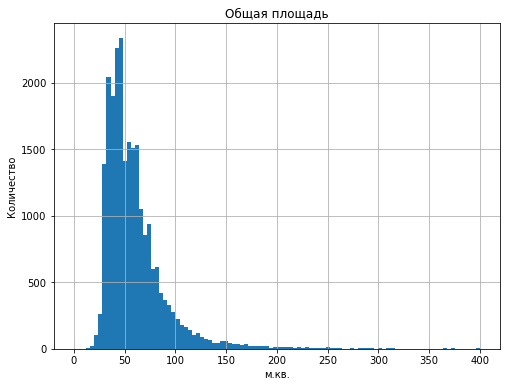

In [20]:
df.hist('total_area', bins = 100, range = (0, 400), figsize = (8,6)) # гистограмма по общей площади
plt.title('Общая площадь')
plt.xlabel('м.кв.')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

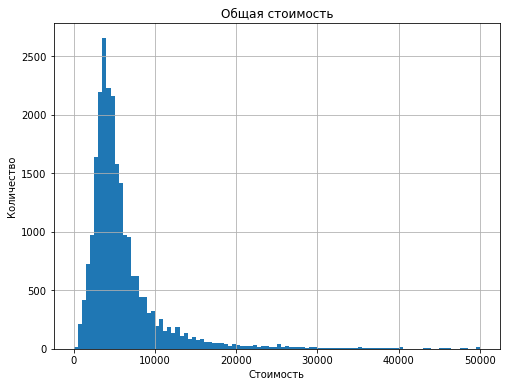

In [21]:
df.hist('last_price', bins = 100, range = (0, 50000), figsize = (8,6)) # гистограмма стоимости квартир
plt.title('Общая стоимость')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

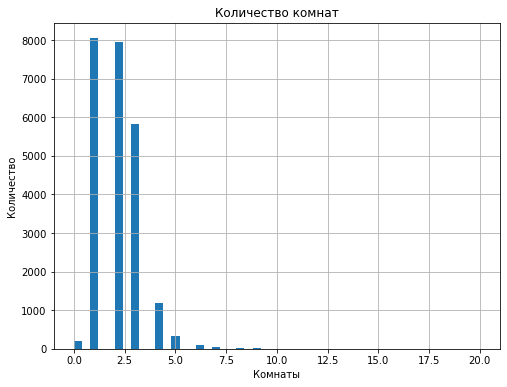

In [22]:
df.hist('rooms', bins = 50, range = (0, 20), figsize = (8,6)) # гистограмма по кол-ву комнат
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

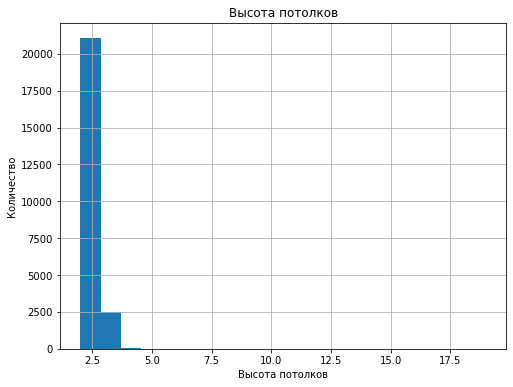

In [23]:
df.hist('ceiling_height', bins = 20, range = (2, 19), figsize = (8,6)) # гистограмма по потолкам
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество')


По предарительному анализу гистограм следующие показатели:

- по площади квартир самые популярные 45-50 м.кв.;
- по цене за квартиру самые популярные площади по цене около 2млн.600тыс.руб.;
- самые популярные квартиры однокомнатные и двухкомнатные ;
- высота потолков - от 2.50-2.65 метров.

In [24]:
display('Медианное значение площади:{:.2f}'.format(df.total_area.median()))
display('Медианное значение цены:{:.2f}'.format(df.last_price.median()))

'Медианное значение площади:52.00'

'Медианное значение цены:4650.00'

## Время продажи. Среднее и медиана.

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

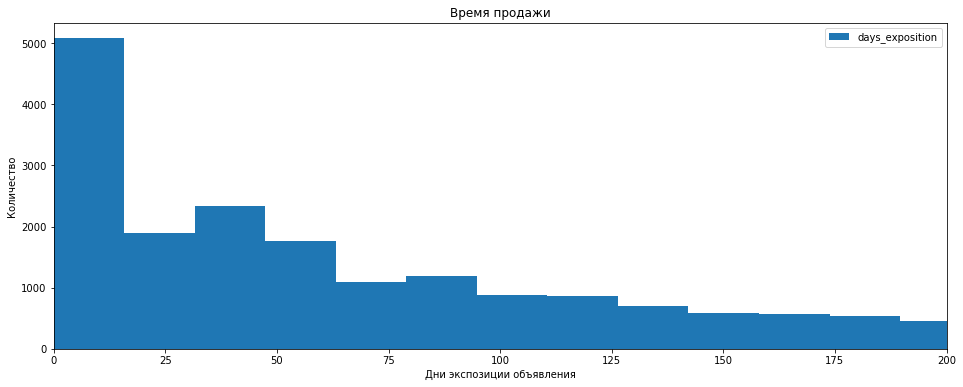

'Среднее значение времени продажи квартиры: 156.61'

'Медианное значение дней продажи квартиры: 74.00'

In [25]:
display(df['days_exposition'].describe())

df.plot(y='days_exposition', kind='hist', bins=100, figsize=(16,6), xlim=(0,200), title='Время продажи')
plt.title('Время продажи')
plt.xlabel('Дни экспозиции объявления')
plt.ylabel('Количество')
plt.show()

display('Среднее значение времени продажи квартиры: {:.2f}'.format(df.days_exposition.mean()))
display('Медианное значение дней продажи квартиры: {:.2f}'.format(df.days_exposition.median()))

Здесь видим очень равные отрезки с изменениями, что похоже на ротацию обьявлений в определенный период времени (15/30 дней). Может быть через 100 дней они становятся платными, а до этого времени бесплатны, в любом случае, после выставления объявление должно быть выше в поиске. Сильная разница между средним значением и медианой предположительно может означать выбросы.

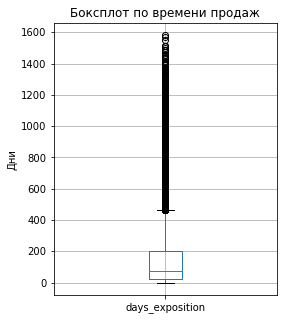

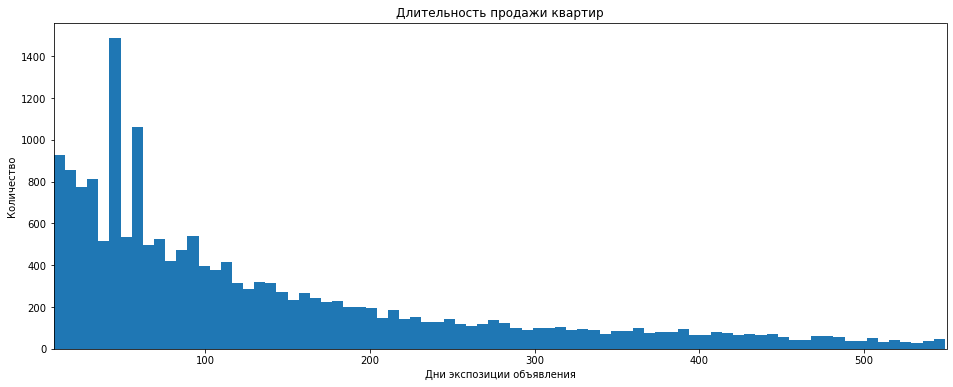

45    880
60    538
30    208
90    204
14    148
9     143
20    139
8     139
44    138
11    135
Name: days_exposition, dtype: int64

'Медианное значение времени продажи 91.0 день'

In [26]:
df.boxplot(["days_exposition"], figsize=(4,5))
plt.title('Боксплот по времени продаж')
plt.ylabel('Дни')
plt.show()
 
# избавляемся от выбросов по скорости продаж
time_exposition = df.query('7 < days_exposition < 550')['days_exposition']
time_exposition = time_exposition.astype(int)

time_exposition.plot(kind='hist', bins=80, xlim=(8,550), figsize=(16,6))
plt.title("Длительность продажи квартир")
plt.xlabel('Дни экспозиции объявления')
plt.ylabel('Количество')
plt.show()


display(time_exposition.value_counts().head(10))

display(f"Медианное значение времени продажи {time_exposition.median()} день")

Большинство продаж приходится на 45 и 60 дней.
Медианное значение 91 день.
Cогласно гистограмме, многие квартиры продаются в первую неделю после публикации, скорее всего это новостройки. 
Самая долгая продажа длилась 1580 дне, судя о максимальному значению столбца. Причин долгой продажи может быть очень много, от неудачного района или какого-то существенного минуса квартиры, до завышенной цены.

## Факторы влияющие на стоимость квартиры:  площадь, кол-во комнат , удалённость от центра, этаж, дата размещения .

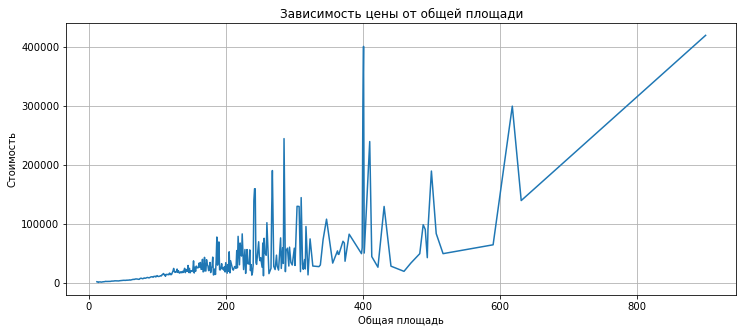

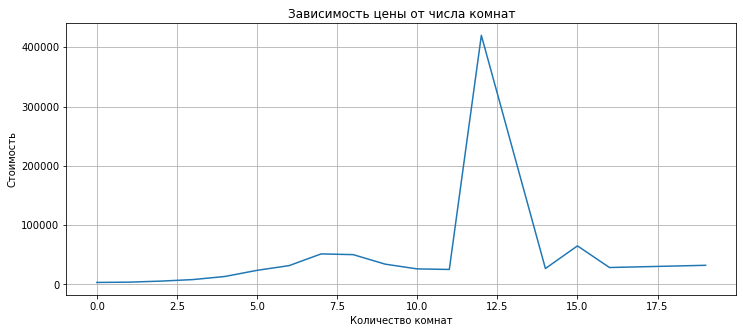

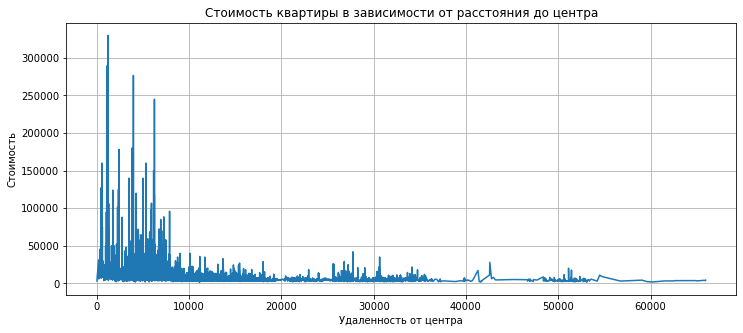

,last_price,total_area,cityCenters_nearest,rooms
last_price,1.000000,0.653654,-0.050961,0.363343
total_area,0.653654,1.000000,-0.077069,0.758347
cityCenters_nearest,-0.050961,-0.077069,1.000000,-0.059845
rooms,0.363343,0.758347,-0.059845,1.000000


In [27]:
#df.plot(x='last_price', y='total_area', kind='scatter', figsize=(15,5), alpha=0.3)
df.groupby('total_area')['last_price'].mean().plot(figsize=(12,5), grid=True)
plt.title('Зависимость цены от общей площади')
plt.ylabel('Стоимость')
plt.xlabel('Общая площадь')
plt.show()

#df.plot(x='last_price', y='rooms', kind='scatter', figsize=(15,5), alpha=0.3)
df.groupby('rooms')['last_price'].mean().plot(figsize=(12,5), grid=True)
plt.title('Зависимость цены от числа комнат')
plt.ylabel('Стоимость')
plt.xlabel('Количество комнат')
plt.show()


#df.plot(x='last_price', y='cityCenters_nearest', kind='scatter', figsize=(15,5), alpha=0.3)
df.groupby('cityCenters_nearest')['last_price'].mean().plot(figsize=(12,5), grid=True)
plt.title('Стоимость квартиры в зависимости от расстояния до центра')
plt.xlabel('Удаленность от центра')
plt.ylabel('Стоимость')
plt.show()

df[['last_price','total_area','cityCenters_nearest','rooms']].corr()

На графике зависимости стоимости квартиры от общей площади явно видна положительная корреляция.
На графике стоимости квартиры от расстояния до центра города также видна зависимость, чем дальше квартира - тем дешевле она стоит.

Text(0, 0.5, 'Количество')

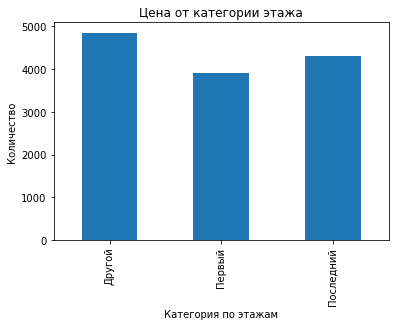

In [28]:
#как зависит стоимость квартиры от этажа
df.groupby('floor_category')['last_price'].median().plot(kind='bar')
plt.title('Цена от категории этажа')
plt.xlabel('Категория по этажам')
plt.ylabel('Количество')

Первый этаж продается дешевле, чуть дороже в среднем последний, и остальные этажи выигрывают у обоих в цене.

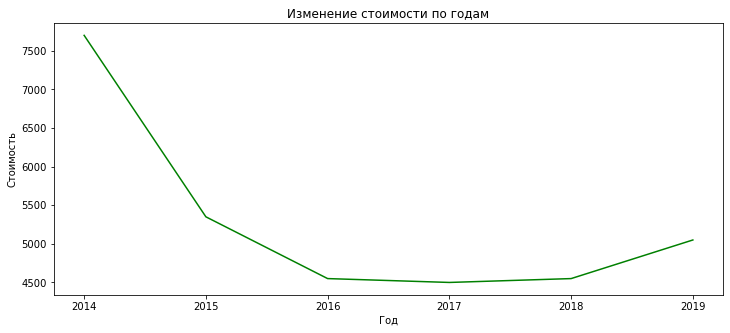

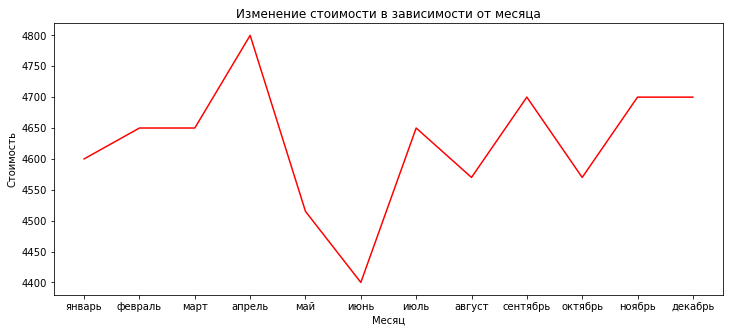

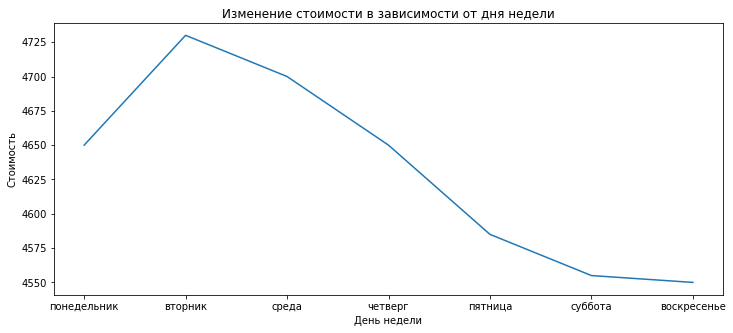

In [29]:
#как зависит стоимость квартиры от даты размещения: дня недели, месяца и года
year_price = df[['year', 'last_price']].groupby(['year']).median().sort_index()
plt.figure(figsize=(12,5))
plt.plot( year_price.index, year_price['last_price'], c='green')
plt.title('Изменение стоимости по годам')
plt.xlabel('Год')
plt.ylabel('Стоимость')
plt.show()

month_price = df[['month', 'last_price']].groupby(['month']).median().sort_index()
month_price.index = ['январь', 'февраль', 'март', "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь"]
plt.figure(figsize=(12,5))
plt.plot( month_price.index, month_price['last_price'], c='red')
plt.title('Изменение стоимости в зависимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')
plt.show()

day_price = df[['weekday', 'last_price']].groupby(['weekday']).median().sort_index()
day_price.index = ["понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье"]
plt.figure(figsize=(12,5))
plt.plot( day_price.index, day_price['last_price'] )
plt.xlabel('День недели')
plt.ylabel('Стоимость')
plt.title('Изменение стоимости в зависимости от дня недели')
plt.show()

Пик стоимости квартир был в 2014 году, далее падает и начинает расти с 2018 года.
По месяцам пик цены приходится на апрель, в июне видимо все готовятся к отпуску и неохотно занимаются сделками.
Больше всего стоимость квартир во вторник.

Также посмотрим на то, какое количество объявлений попало в каждую категорию:

In [30]:
display(df.groupby('year')['last_price'].count())

year
2014     137
2015    1191
2016    2783
2017    8190
2018    8519
2019    2879
Name: last_price, dtype: int64

In [31]:
display(df.groupby('month')['last_price'].count())

month
1     1500
2     2640
3     2587
4     2379
5     1274
6     1760
7     1695
8     1744
9     1981
10    2127
11    2371
12    1641
Name: last_price, dtype: int64

In [32]:
display(df.groupby('weekday')['last_price'].count())

weekday
0    3612
1    4183
2    3974
3    4295
4    4000
5    1936
6    1699
Name: last_price, dtype: int64

## 10 населённых пунктов с наибольшим числом объявлений в центре

In [33]:
#10 районов с самой высокой стоимостью кв. метра
#top_location=df.groupby('locality_name')['metre_square'].count()
top_location= df.pivot_table(index='locality_name',values='metre_square', aggfunc=('count','median'))
top_location.sort_values(by='count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15721,105.0
посёлок Мурино,522,86.0
посёлок Шушары,440,77.0
Всеволожск,398,65.0
Пушкин,369,100.0
Колпино,338,74.5
посёлок Парголово,327,92.0
Гатчина,307,67.0
деревня Кудрово,299,92.0


Cамые дорогие квартиры в Санкт-Петербурге и городе Пушкине, судя по медианным значениям. Чем дальше от Санкт-Петербурга, тем дешевле, Выборге средняя цена за квадратный метр в 2 раз ниже.

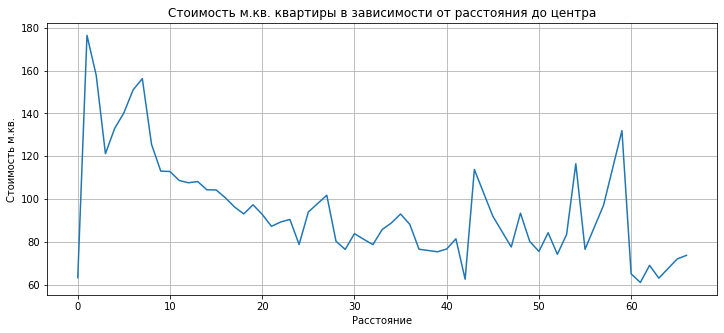

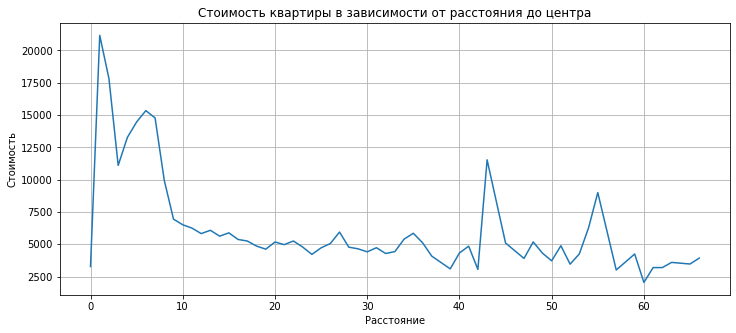

In [34]:
df['distance_cityCenters'] =( df['cityCenters_nearest']/1000 ).round().astype('Int64')
df.groupby('distance_cityCenters')['metre_square'].mean().plot(figsize=(12,5), grid=True)
plt.title('Стоимость м.кв. квартиры в зависимости от расстояния до центра')
plt.xlabel('Расстояние')
plt.ylabel('Стоимость м.кв.')
plt.show()

df.groupby('distance_cityCenters')['last_price'].mean().plot(figsize=(12,5), grid=True)
plt.title('Стоимость квартиры в зависимости от расстояния до центра')
plt.xlabel('Расстояние')
plt.ylabel('Стоимость')
plt.show()


Так как в обсуждении проекта были сомнения, как корректно считать зависимость стоимости: кв.м.или общей стоимостью, для сверки решила сделать два графика. В целом показатели сопоставимы: стоимость квартир растет в радиусе 8 км от центра.

## Площадь, цена, число комнат, высота потолков в центре. 

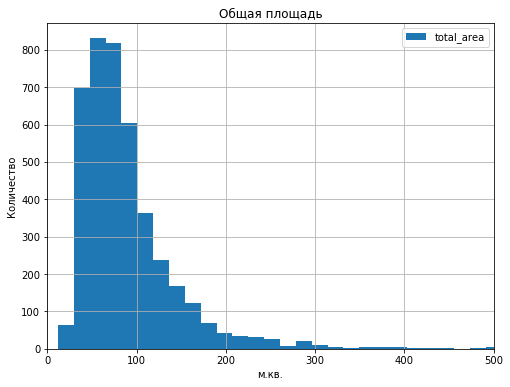

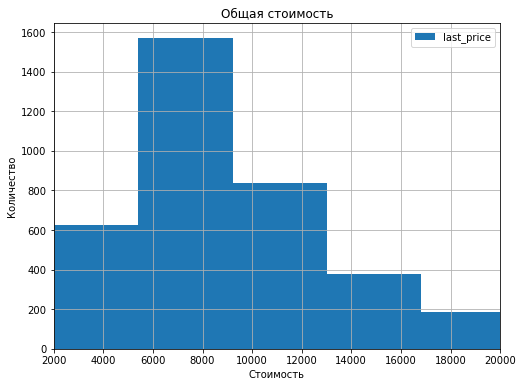

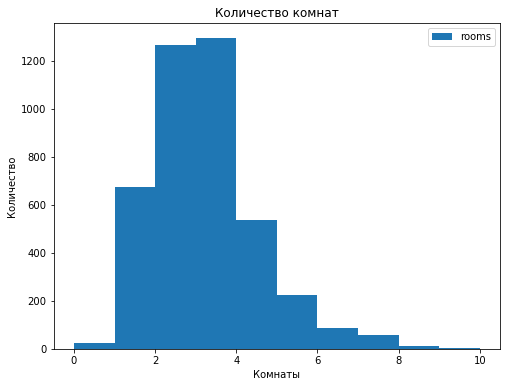

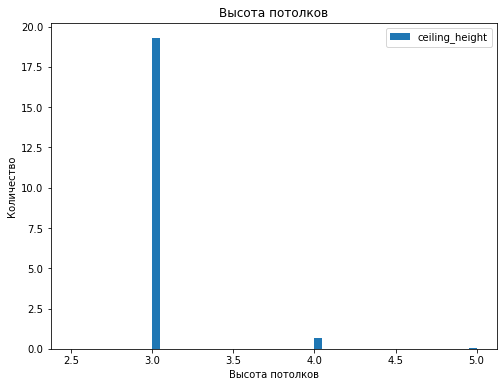

,last_price,rooms,total_area,floor,cityCenters_nearest,days_exposition
last_price,1.000000,0.363343,0.653654,0.026576,-0.050961,0.053577
rooms,0.363343,1.000000,0.758347,-0.150862,-0.059845,0.079293
total_area,0.653654,0.758347,1.000000,-0.024955,-0.077069,0.097187
floor,0.026576,-0.150862,-0.024955,1.000000,0.062528,-0.021349
cityCenters_nearest,-0.050961,-0.059845,-0.077069,0.062528,1.000000,-0.017096
days_exposition,0.053577,0.079293,0.097187,-0.021349,-0.017096,1.000000


In [35]:
flats_in_center = df.query('distance_cityCenters <= 8 and locality_name == "Санкт-Петербург"')

flats_in_center.plot(y='total_area', kind='hist', grid=True, bins=50, xlim=(0,500), figsize=(8,6))
plt.title('Общая площадь')
plt.xlabel('м.кв.')
plt.ylabel('Количество')

flats_in_center.plot(y='last_price', kind='hist',grid=True, bins=200,xlim=(2000,20000), figsize=(8,6))
plt.title('Общая стоимость')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

flats_in_center.plot(y='rooms', kind='hist', bins=10, range=(0, 10), figsize=(8,6))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество')

flats_in_center.plot(y='ceiling_height', kind='hist', bins=50, range=(2.5, 5), density=True, figsize=(8,6))
plt.title('Высота потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество')
plt.show()

#flats_in_center[['metre_square', 'cityCenters_nearest']].corr()
#flats_in_center[['last_price', 'cityCenters_nearest']].corr()
compare_4_columns = df[['last_price', 'rooms', 'total_area', 'floor', 'cityCenters_nearest', 'days_exposition']]
corr_4 = compare_4_columns.corr()
display(corr_4)

В центре более популярны квартиры:
- площадью около 70 м.кв.;
- 4-х комнатные и также 3-х комнатные;
- высота потолков 3 м;
- стоимостью от 5,7 до 9,2 млн.руб.

Для всех квартир были такие данные:
- по площади квартир самые популярные 45-50 м.кв.;
- самые популярные квартиры однокомнатные и двухкомнатные ;
- высота потолков - от 2.50-2.65 метров;
- по цене за квартиру самые популярные площади по цене около 2 млн.600тыс.руб.

In [36]:
display('Медианное значение площади:{:.2f}'.format(flats_in_center['total_area'].median()))
display('Медианное значение цены:{:.2f}'.format(flats_in_center['last_price'].median()))


'Медианное значение площади:76.00'

'Медианное значение цены:8950.00'

В общих данных по всем квартирам
- Медианное значение площади:52.00
- Медианное значение цены:4650.00

Данные по квартирам в центре существенно отличаются.

## Влияние этажа, удалённости от центра, даты размещения объявления для квартир в центре

Text(0, 0.5, 'Количество')

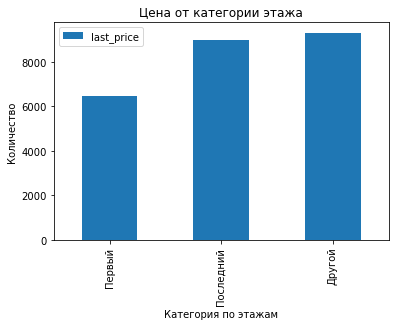

In [37]:
floor_price_center = (flats_in_center[['floor_category', 'last_price']].groupby('floor_category').median()
                      .sort_values('last_price')).plot(kind='bar')
plt.title('Цена от категории этажа')
plt.xlabel('Категория по этажам')
plt.ylabel('Количество')

Как и по всем квартирам в целом, первый этаж в центре ниже по стоимости относительно последнего и остальных.

,last_price,cityCenters_nearest
last_price,1.000000,-0.076585
cityCenters_nearest,-0.076585,1.000000


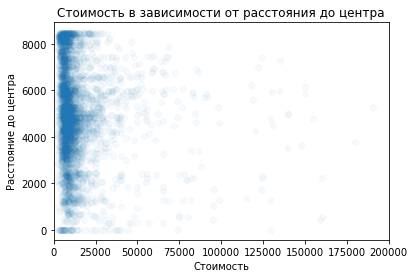

In [38]:
plt.scatter(flats_in_center['last_price'], flats_in_center['cityCenters_nearest'], alpha=0.03)
plt.xlim(0,200000)
plt.title('Стоимость в зависимости от расстояния до центра')
plt.xlabel('Стоимость')
plt.ylabel('Расстояние до центра')

flats_in_center[['last_price', 'cityCenters_nearest']].corr()

Видимо стоимость квартир зависит не только от близости к дворцовой площади. Скорее всего имеет значение район и состояние здания.

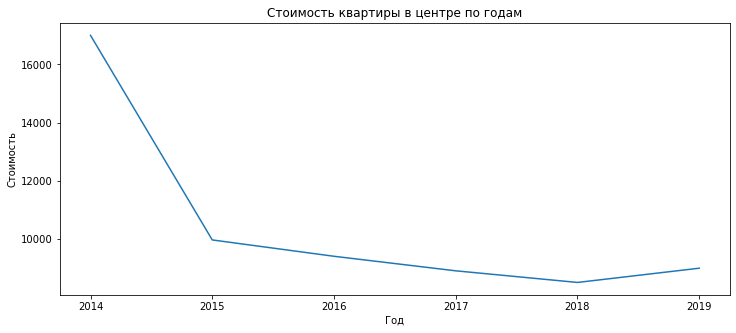

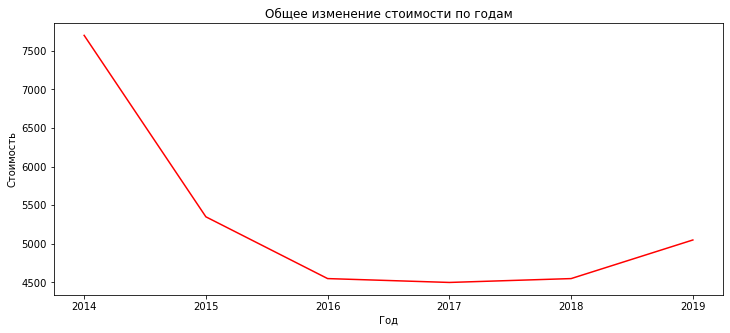

In [39]:
#Сравнение показателей стоимости по годам центра и в общем
year_price_center = flats_in_center[['year', 'last_price']].groupby(['year']).median().sort_index()
plt.figure(figsize=(12,5))
plt.plot( year_price_center.index, year_price_center['last_price'])
plt.title('Стоимость квартиры в центре по годам')
plt.xlabel('Год')
plt.ylabel('Стоимость')
plt.show()

year_price = df[['year', 'last_price']].groupby(['year']).median().sort_index()
plt.figure(figsize=(12,5))
plt.plot( year_price.index, year_price['last_price'], c='red')
plt.title('Общее изменение стоимости по годам')
plt.xlabel('Год')
plt.ylabel('Стоимость')
plt.show()

В целом данные соспоставимы, так же пик цены приходится на 2014 год и начинает расти с 2018.

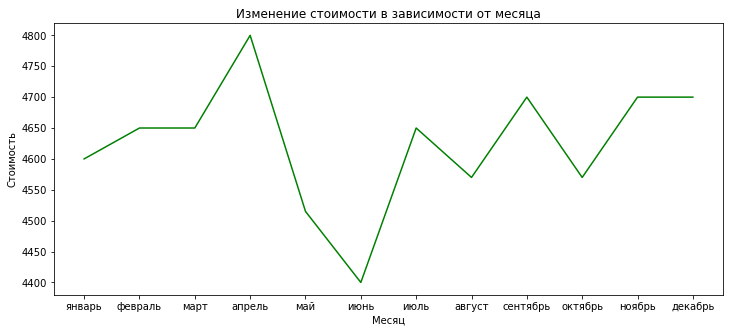

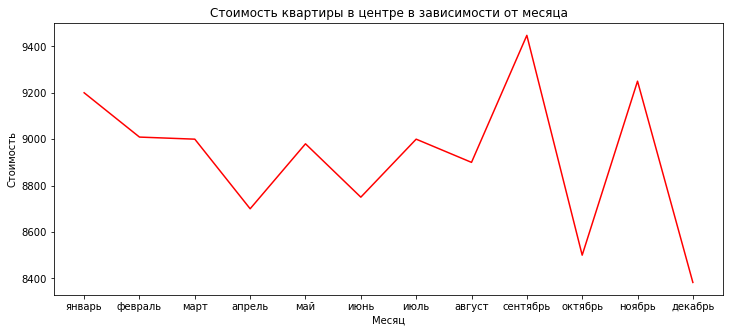

In [40]:
month_price = df[['month', 'last_price']].groupby(['month']).median().sort_index()
month_price.index = ['январь', 'февраль', 'март', "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь"]
plt.figure(figsize=(12,5))
plt.plot( month_price.index, month_price['last_price'], c='green')
plt.title('Изменение стоимости в зависимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')
plt.show()

month_price_center = flats_in_center[['month', 'last_price']].groupby(['month']).median().sort_index()
month_price_center.index = ['январь', 'февраль', 'март', "апрель", "май", "июнь", "июль", "август", "сентябрь", "октябрь", "ноябрь", "декабрь"]
plt.figure(figsize=(12,5))
plt.plot( month_price_center.index, month_price_center['last_price'], c='red')
plt.title('Стоимость квартиры в центре в зависимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')
plt.show()

По месяцам динамика различна: в центре квартиры больше стоят в сентябре, ноябре и январе, а в вобщей статистике апрель, сентябрь, нояябрь-декабрь самые высокие по стоимости. Самое большое падение цен в центре в октябре и декабре, по всем остальным в июне.

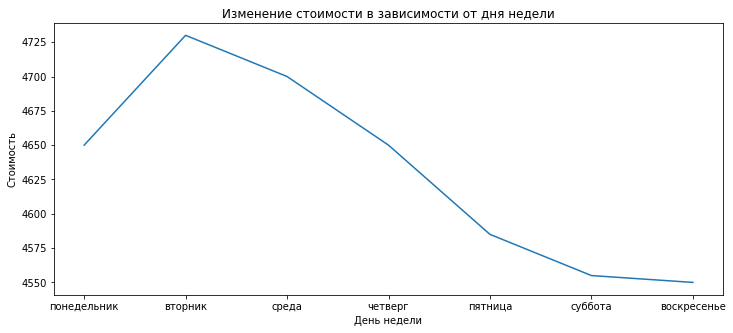

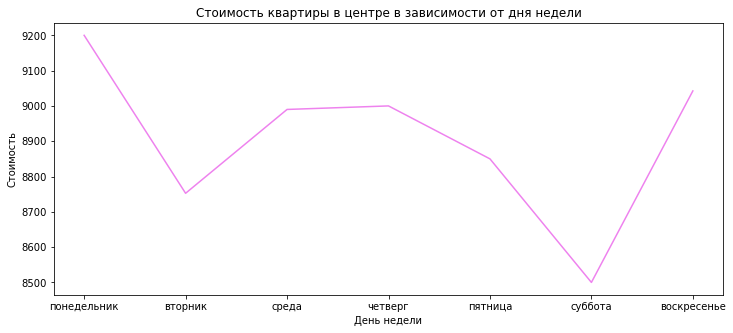

In [41]:
day_price = df[['weekday', 'last_price']].groupby(['weekday']).median().sort_index()
day_price.index = ["понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье"]
plt.figure(figsize=(12,5))
plt.plot( day_price.index, day_price['last_price'] )
plt.xlabel('День недели')
plt.ylabel('Стоимость')
plt.title('Изменение стоимости в зависимости от дня недели')
plt.show()

day_price_center = flats_in_center[['weekday', 'last_price']].groupby(['weekday']).median().sort_index()
day_price_center.index = ["понедельник", "вторник", "среда", "четверг", "пятница", "суббота", "воскресенье"]
plt.figure(figsize=(12,5))
plt.plot( day_price_center.index, day_price_center['last_price'], c='violet' )
plt.xlabel('День недели')
plt.ylabel('Стоимость')
plt.title('Стоимость квартиры в центре в зависимости от дня недели')
plt.show()

По дням недели в центре вторник и суббота самые низкие по стоимости, по общим показателям во вторник самый высокий ценник. В воскесенье и понедельник самые высокие цены для центральных квартир.

# ОБЩИЙ ВЫВОД

1. На первом шаге мы посмотрели пропуски и избавились от них. Дубликатов не обнаружено.

2. На втором этапе для пропущенных значений этажности,высоты потолков, жилой и площади кухни домов были восстановлены значения по средним данным. Заполнены другие пропущенные значения. Изменены типы данных.

3. На третьем шаге были посчитаны и добавлены в таблицу:
- Округлена стоимость;
- Добавлена цена квадратного метра;
- День недели, месяц и год публикации объявления;
- Этаж квартиры; варианты — первый, последний, другой;
- Соотношение жилой и общей площади, а также отношение площади кухни к общей.

4. Был произведен исследовательский анализ данных и было выявлено, что:
- В среднем квартира продается 91 день, а больше всего на 45 день.45 дней предположительно могу связать с временем оформления ипотечного кредита.
- Стоимость квартиры прямопропорционально зависит от площади и количества комнат и обратно пропорциональна расстоянию до центра.
- На первом этаже квартиры стоят дешевле, последний продается лучше, но популярнее другие этажи одинаково в центре, и в общей таблице.

5.
- Стоимость квартир с 2014 по 2017 снизилась, начала расти с 2018 года.
- В июне квартиры продаются по самой низкой стоимости, а в апреле по самой высокой. 
- Квартира выставленная на продажу в воскресенье в среднем продается на 200 тыс. дешевле чем во вторник.

6. Самые дорогие квартиры находятся в Санкт-Петербурге и Мурино, а самые дешевые в Выборге.

7. Граница центра около 8 километров.

8. Квартиры в центре сильно отличаются в цене, они примерно в два раза дороже. Площадь квартир больше в среднем на 20 кв.м. Чаще встречаются трех- и четырехкомнатные квартиры, нежели однокомнатные. Более высокие потолки - 3 метра, для остальных квартир из датасета около- 2,65. 

9. Стоимость квартир в центре также зависит от количества комнат, от этажа (на первом - дешевле), но от близости к центру цена квартиры не зависит, в отличие от общей таблицы.

11. 
- Стоимость квартир в центре Санкт-Петербурга также упала с 2014 года и с 2018 растёт.
- По самой дешевой цене квартиры продаются в декабре, по самой дорогой - в сентябре.
- Квартиры, размещаемые на продажу по субботам продаются дешевле, чем в остальные дни. Пик стоимости приходится на понедельник.